In [32]:

import pandas as pd
import matplotlib
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("darkgrid")

<IPython.core.display.Javascript object>


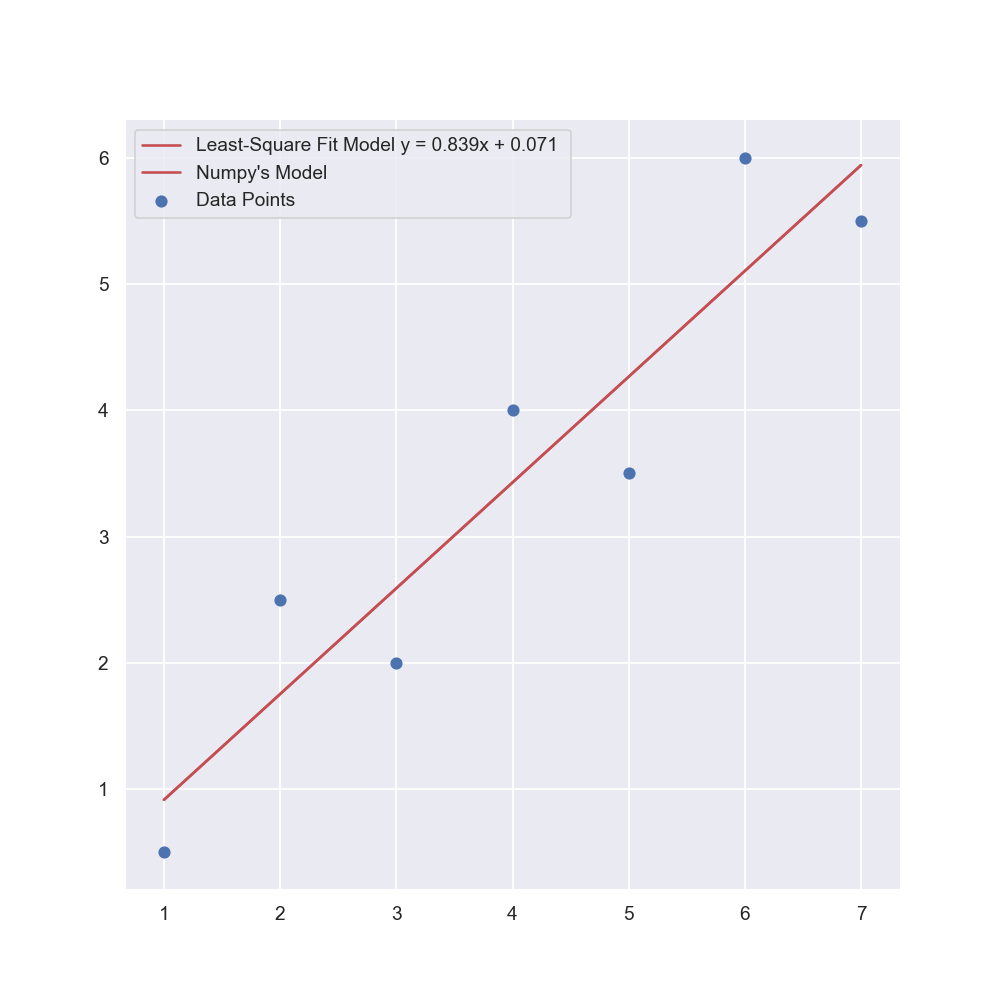

          x     y   Mean Err  Line Fit Err  y(numpy model)    x*y    x*2
0       1.0   0.5   8.576531      0.168686        0.910714    0.5    1.0
1       2.0   2.5   0.862245      0.562500        1.750000    5.0    4.0
2       3.0   2.0   2.040816      0.347258        2.589286    6.0    9.0
3       4.0   4.0   0.326531      0.326531        3.428571   16.0   16.0
4       5.0   3.5   0.005102      0.589605        4.267857   17.5   25.0
5       6.0   6.0   6.612245      0.797194        5.107143   36.0   36.0
6       7.0   5.5   4.290816      0.199298        5.946429   38.5   49.0
Total  28.0  24.0  22.714286      2.991071       24.000000  119.5  140.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Standard Deviation is 1.9456912102680337
The Standard Error of Estimate 0.7734431367038469
Correclation Coefficient 0.6024841287136723
Least-Square Fit Model y = 0.839x + 0.071


In [80]:
fig= plt.figure(figsize=(8,8))
ax = plt.subplot()
sns.despine()


x = np.array([1,2,3,4,5,6,7])
y = np.array([0.5,2.5,2,4,3.5,6,5.5])

n = len(x)

# Least Square Fit
a1 = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
a0 = np.sum(y)/len(y) - a1*np.sum(x)/len(x)
yapprox = a0 + a1*x

line1, = plt.plot(x,yapprox,'r', label=f"Least-Square Fit Model y = {np.round(a1,3)}x + {np.round(a0,3)} ")
plt.scatter(x,y, label="Data Points")

#using numpy's own model of regression which should in theory be the same as the calculations
model = np.polyfit(x,y,1)
line2, = plt.plot(x,np.poly1d(model)(x), 'r',label = "Numpy's Model")
plt.legend()
plt.show()


df = pd.DataFrame({
    'x':x,
    'y':y,
    'Mean Err': (y-np.sum(y)/len(y))**2,
    'Line Fit Err': (y -yapprox )**2,
    'y(numpy model)':np.poly1d(model)(x),
    'x*y' : x*y,
    'x*2' : x**2,
    
})

st = np.sqrt(np.sum((y-np.sum(y)/len(y))**2)/(n-1))
sr = np.sqrt(np.sum((y -yapprox )**2)/(n-2))
df.loc['Total',:]= df.sum(axis=0)
print(df)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'The Standard Deviation is {st}')
print(f'The Standard Error of Estimate {sr}')
print(f'Correclation Coefficient {(st-sr)/st}')
print(f'Least-Square Fit Model y = {np.round(a1,3)}x + {np.round(a0,3)}')